# 关系拟合

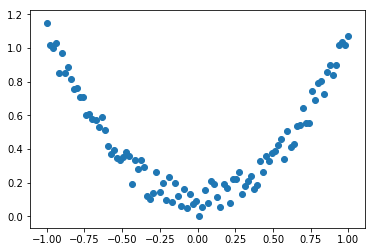

In [1]:
#建立数据集
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(1)

x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1) # x data (tensor), shape=(100, 1)
y = x.pow(2)+0.2*torch.rand(x.size()) #caoshenshuju 
x,y = torch.autograd.Variable(x),Variable(y)

#画图
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()


建立神经网络
建立一个神经网络我们可以直接运用 torch 中的体系. 先定义所有的层属性( __init__() ), 然后再一层层搭建( forward(x) )层于层的关系链接. 建立关系的时候, 我们会用到激励函数, 如果还不清楚激励函数用途的同学, 这里有非常好的一篇动画教程 （如下）.

In [2]:
class Net(torch.nn.Module):
    def __init__(self,n_features,n_hidden,n_output):
        super(Net,self).__init__()    #继承__init__
        self.hidden = torch.nn.Linear(n_features,n_hidden)
        self.predict = torch.nn.Linear(n_features,n_output)
    def forward(self,x):
        #正向传播输入值，神经网络分析输出值
        x  = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
net = Net(n_features=1,n_hidden=10,n_output=1)
print(net)
        

Net(
  (hidden): Linear(in_features=1, out_features=10)
  (predict): Linear(in_features=1, out_features=1)
)


In [3]:
#训练网络
optimizer = torch.optim.SGD(net.parameters(),lr=0.5)
loss_function = torch.nn.MSELoss()

#可视化训练过程
plt.ion()
for t in range(100):
    prediction = net(x)   # 喂给 net 训练数据 x, 输出预测值
    loss = loss_function(prediction,y)
    optimizer.zero_grad()#清空上一步残余的更新参数值
    loss.backward()
    optimizer.step()#将参数更新值施加到net的parameters上
    # 接着上面来
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20,'color':  'red'})
        plt.pause(0.1)
plt.ioff()
plt.show()

RuntimeError: size mismatch, m1: [100 x 10], m2: [1 x 1] at c:\anaconda2\conda-bld\pytorch_1513133520683\work\torch\lib\th\generic/THTensorMath.c:1416